In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta
from scipy.optimize import fsolve

constants and parameters

In [30]:
pi = np.pi
z3 = zeta(3)
kb = 1.38e-23
c = 3e8
e = 1.6e-19
hc = 6.63e-34*c/e
hbar = 6.632-34/(e*2*pi)
T0 = 2.7255*kb/e
me = 0.511e6
eta = 6.05e-10
B = 13.6
h = 0.673
omrh2 = 2.473e-5
ommh2 = 0.14187
oml = 0.685

functions

In [17]:
#temperature to redshift
def T(z):
    return T0*(1+z)
#photon number density
def n_g(z):
    return (T(z)/hc)**3*16*pi*z3
#Saha equation
def Saha(z):
    return 2**2.5/np.sqrt(pi)*(T(z)/me)**1.5*eta*z3*np.exp(B/T(z))
#ground state ionisation fraction
def Xsaha(z):
    S = Saha(z)
    return (-1+np.sqrt(1+4*S))/(2*S)

In [18]:
#photon density at present
ng0 = n_g(0)
print(ng*1e-6)

408.5698838395317


In [19]:
#baryonic density at present
nb = 6.05e-10*ng
print(nb)

0.2471847797229167


In [29]:
# calculating temp below 13.6 eV
z_B = 0.511e6/T0-1
print(z_B)

2173780105.8278923


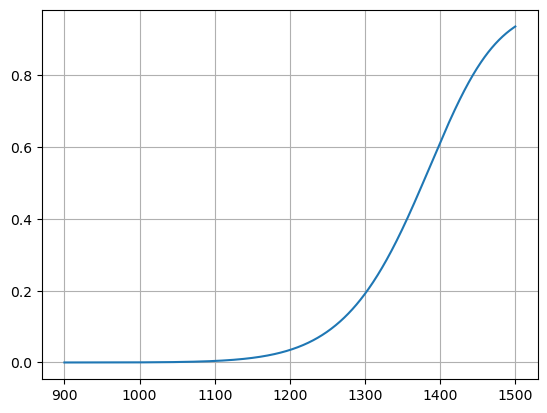

In [21]:
z = np.linspace(900, 1500, 1000)
X = Xsaha(z)
plt.plot(z, X)
plt.grid()
plt.show()

In [28]:
#find when X = fraction
fraction = 0.1
def X_solve(z):
    return Xsaha(z)-fraction
root = fsolve(X_solve, [1300])
print("X = {} when z = {}".format(fraction, root[0]))

X = 0.1 when z = 1258.8165460824798


In [ ]:
E0 = 